# Exploring Buisness Analytics


OBJECTIVE:

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?

Author: Lucky Agarwal
Copyright LuckyAgarwal ,2021

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')



In [27]:
df=pd.read_csv('C:\\Users\\LUCKY\\Downloads\\sparks foundation\\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [28]:
df.shape

(9994, 13)

In [29]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [30]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [31]:
df.skew()

Postal Code    -0.128526
Sales          12.972752
Quantity        1.278545
Discount        1.684295
Profit          7.561432
dtype: float64

In [32]:
#Confirming the presence of null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [33]:
# checking for duplicate records
df[df.duplicated()]


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [34]:
#dropping duplicate records:
df=df.drop_duplicates()
print('the no of duplicated record is:',df.duplicated().sum())

the no of duplicated record is: 0


In [35]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(exclude=np.number)
df_cat['Postal Code'] = df_num['Postal Code']
df_num = df_num.drop(['Postal Code'],1)
print('the numerical columns are :', df_num.columns)
print('\n')
print('the categorical columns are :', df_cat.columns)

the numerical columns are : Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


the categorical columns are : Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Postal Code'],
      dtype='object')


# Univariate analysis

In [36]:
# analysis for categorical columns;
for i in df_cat.columns:
    print(pd.DataFrame({'Count':df[i].value_counts(),'percentage':df[i].value_counts(normalize=True)*100}))
    print('\n')

                Count  percentage
Standard Class   5955   59.687281
Second Class     1943   19.474792
First Class      1537   15.405432
Same Day          542    5.432495


             Count  percentage
Consumer      5183   51.949484
Corporate     3015   30.219505
Home Office   1779   17.831011


               Count  percentage
United States   9977       100.0


                 Count  percentage
New York City      914    9.161070
Los Angeles        746    7.477198
Philadelphia       536    5.372356
San Francisco      506    5.071665
Seattle            424    4.249774
...                ...         ...
Davis                1    0.010023
Rochester Hills      1    0.010023
San Luis Obispo      1    0.010023
Conroe               1    0.010023
Keller               1    0.010023

[531 rows x 2 columns]


                      Count  percentage
California             1996   20.006014
New York               1127   11.295981
Texas                   983    9.852661
Pennsylvania            586 

In [37]:
# the column COUNTRY has only united states as a country , so the column add no relevance to dataset,therefore we drop it
df=df.drop('Country',1)

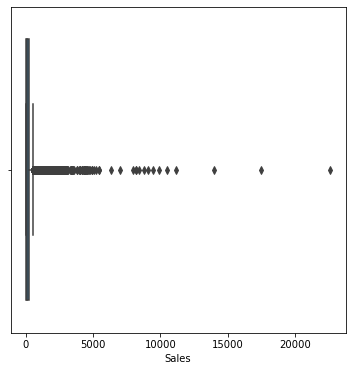

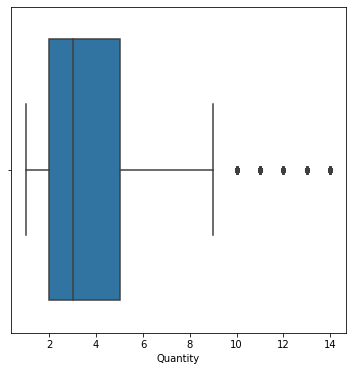

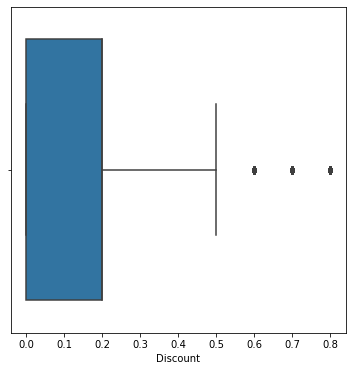

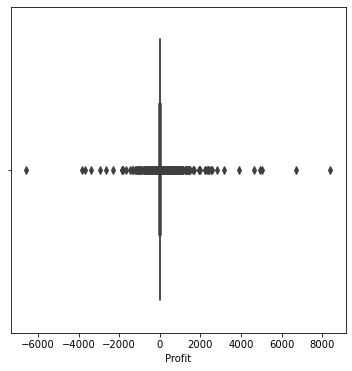

In [38]:
# analysis for numerical columns:
plt.rcParams['figure.figsize']=(6,6)
for i in df_num.columns:
    sns.boxplot(df[i])
    plt.show()

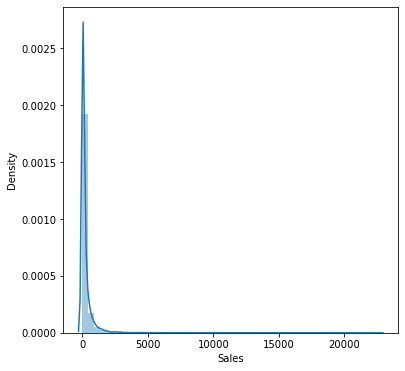

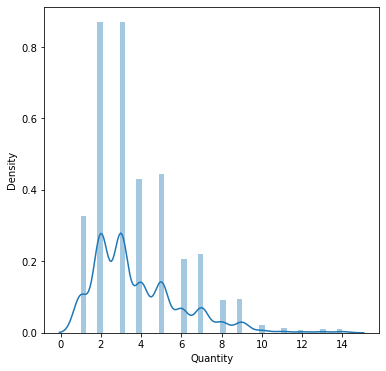

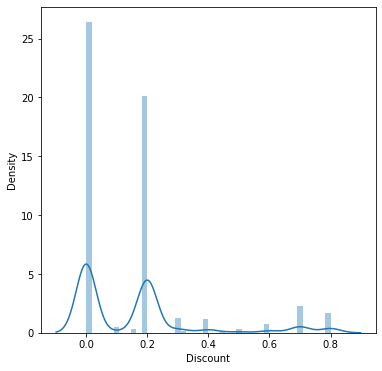

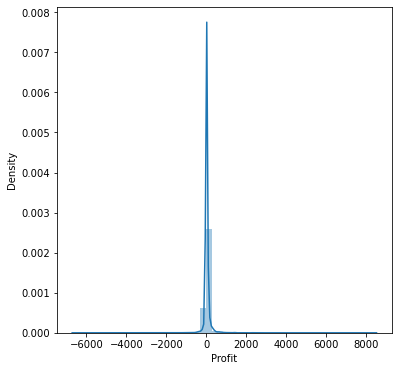

In [39]:
plt.rcParams['figure.figsize']=(6,6)
for i in df_num.columns:
    sns.distplot(df[i],kde=True)
    plt.show()

# BIVARIATE ANALYSIS

LOSS MAKING STATES

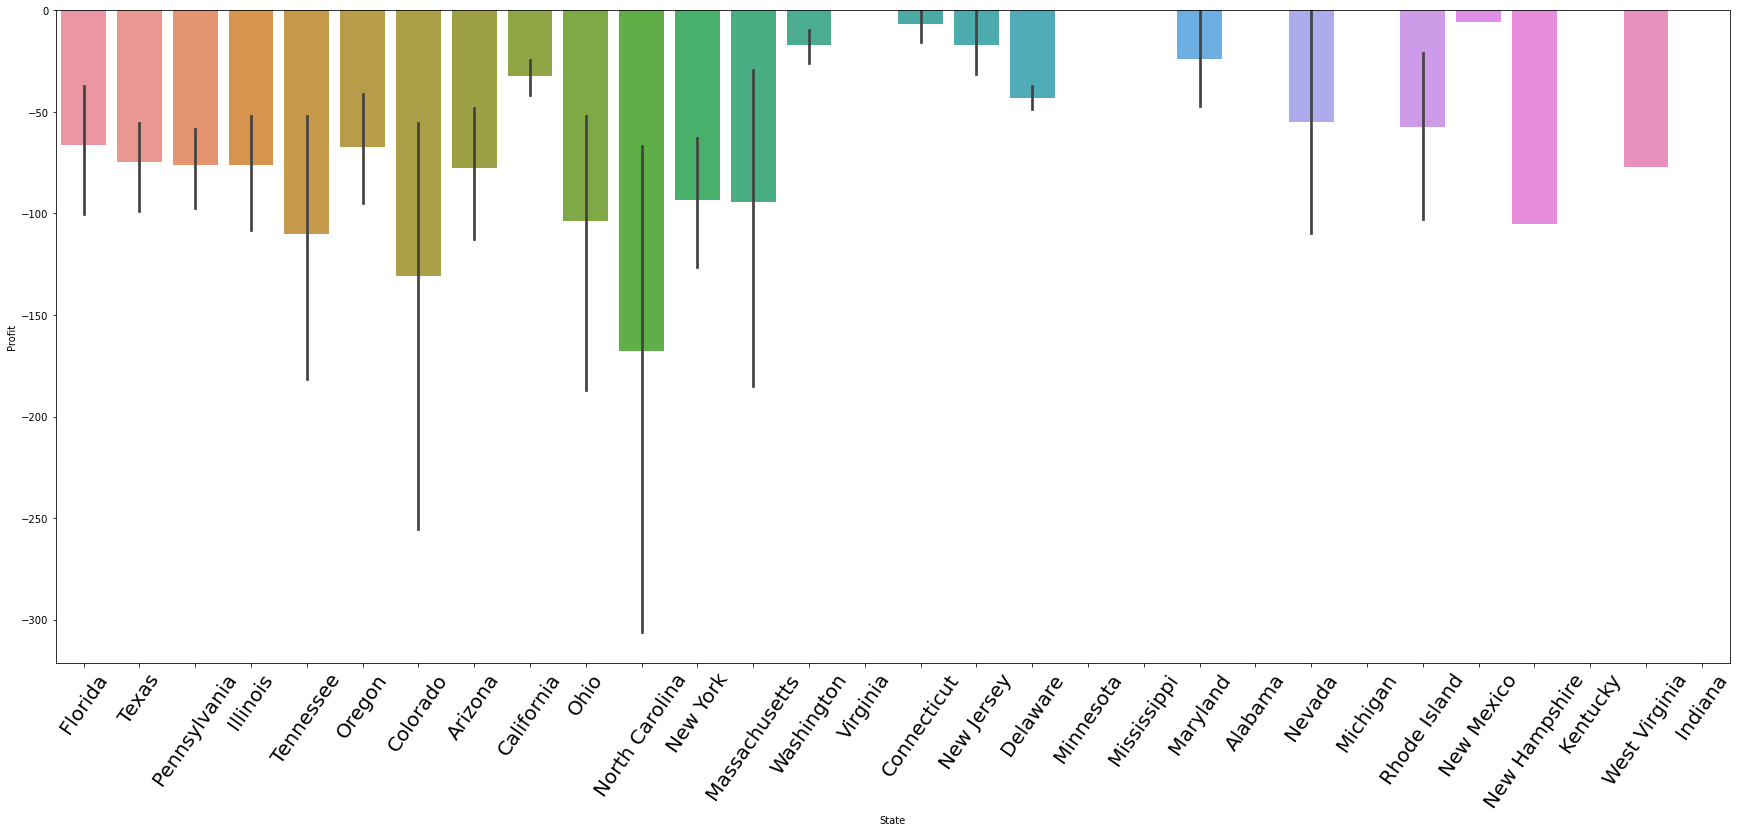

In [40]:
plt.figure(figsize=(30,12))
sns.barplot(df[df['Profit']<=0]['State'],df[df['Profit']<=0]['Profit'])
plt.xticks(rotation=55,fontsize=20)
plt.show()

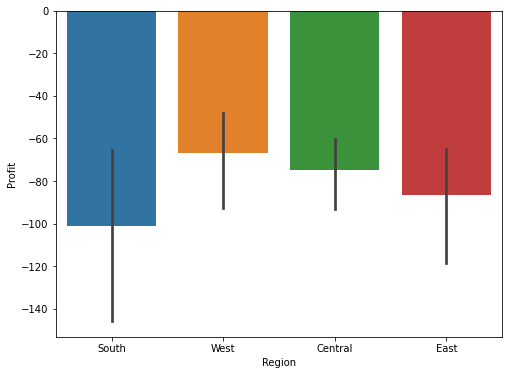

In [41]:
# region wise plot against loss made 
plt.figure(figsize=(8,6))
sns.barplot(df['Region'], df[df['Profit']<=0]['Profit'])
plt.show()

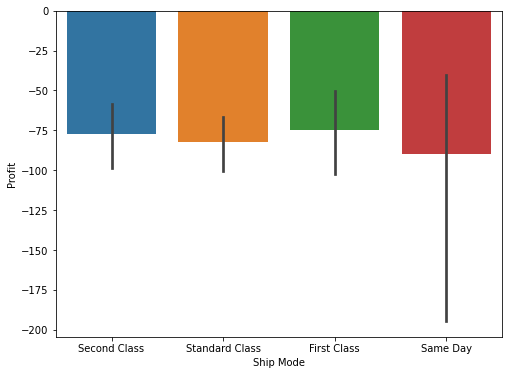

In [42]:
plt.figure(figsize=(8,6))
sns.barplot(df['Ship Mode'], df[df['Profit']<=0]['Profit'])
plt.show()

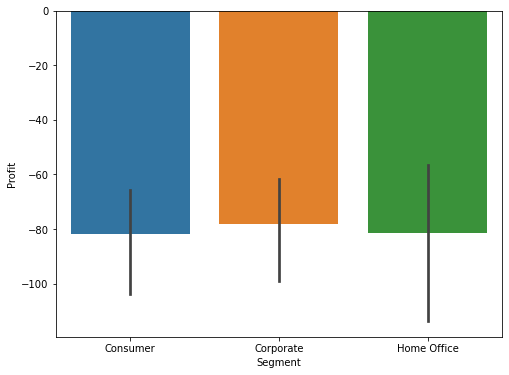

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(df['Segment'], df[df['Profit']<=0]['Profit'])
plt.show()

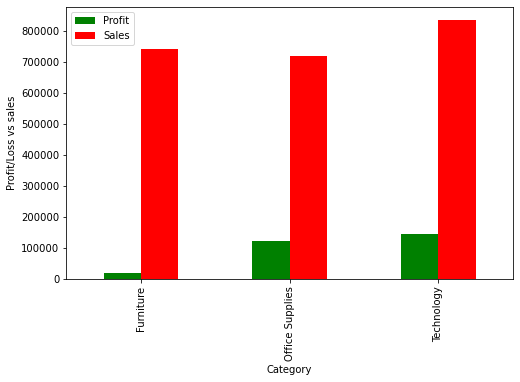

In [44]:
ax=df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['green','red'],figsize=(8,5))
plt.ylabel('Profit/Loss vs sales')

plt.show()

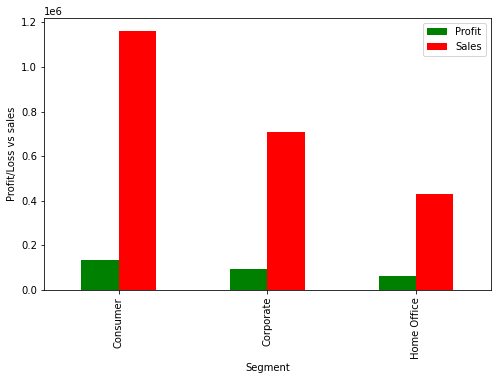

In [45]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['green','red'],figsize=(8,5))
plt.ylabel('Profit/Loss vs sales')
plt.show()

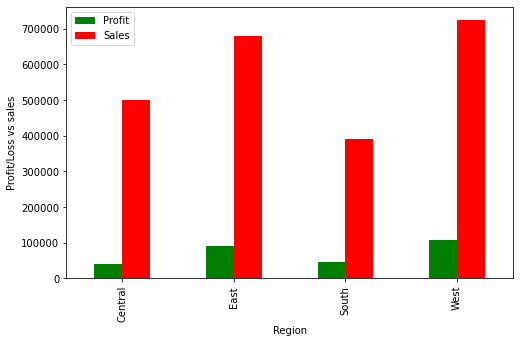

In [46]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['green','red'],figsize=(8,5))
plt.ylabel('Profit/Loss vs sales')
plt.show()

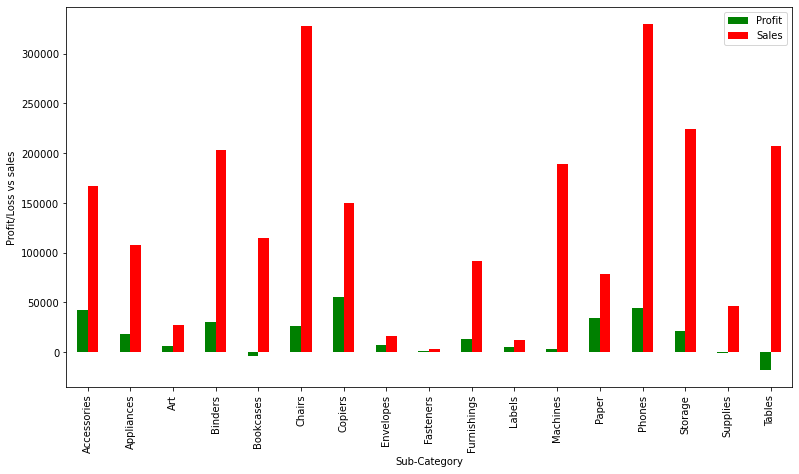

In [47]:
df.groupby('Sub-Category')[['Profit','Sales']].sum().plot.bar(color=['green','red'],figsize=(13,7))
plt.ylabel('Profit/Loss vs sales')
plt.show()